In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [3]:
df = df.drop('Person ID', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [5]:
set(df.Occupation.sort_values())

{'Accountant',
 'Doctor',
 'Engineer',
 'Lawyer',
 'Manager',
 'Nurse',
 'Sales Representative',
 'Salesperson',
 'Scientist',
 'Software Engineer',
 'Teacher'}

In [6]:
df.Gender.value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [7]:
df['Blood Pressure'].nunique()

25

In [8]:
df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [9]:
df['Sleep Disorder'].value_counts(dropna=False)

Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [10]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Normal')

In [11]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [12]:
df.columns

Index(['gender', 'age', 'occupation', 'sleep_duration', 'quality_of_sleep',
       'physical_activity_level', 'stress_level', 'bmi_category',
       'blood_pressure', 'heart_rate', 'daily_steps', 'sleep_disorder'],
      dtype='object')

In [13]:
df[['systolic', 'diastolic']] = df.blood_pressure.str.split('/', expand=True, n=1)

In [14]:
y = df.sleep_disorder
df = df.drop(['sleep_disorder', 'blood_pressure'], axis=1)
df['sleep_disorder'] = y

In [15]:
df

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,systolic,diastolic,sleep_disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83,Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,Normal
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,Normal
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,140,95,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95,Sleep Apnea


In [16]:
def conv_dtypes(df, *cols):
    for col in cols:
        df[col] = df[col].astype('category').cat.codes
        df[['systolic', 'diastolic']] = df[['systolic', 'diastolic']].astype(int)
    return df

In [17]:
df.select_dtypes(exclude='number').columns

Index(['gender', 'occupation', 'bmi_category', 'systolic', 'diastolic',
       'sleep_disorder'],
      dtype='object')

In [18]:
cols = ['gender', 'occupation', 'bmi_category', 'sleep_disorder']

In [19]:
df = conv_dtypes(df, *cols)

In [20]:
df

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,systolic,diastolic,sleep_disorder
0,1,27,9,6.1,6,42,6,3,77,4200,126,83,1
1,1,28,1,6.2,6,60,8,0,75,10000,125,80,1
2,1,28,1,6.2,6,60,8,0,75,10000,125,80,1
3,1,28,6,5.9,4,30,8,2,85,3000,140,90,2
4,1,28,6,5.9,4,30,8,2,85,3000,140,90,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,68,7000,140,95,2
370,0,59,5,8.0,9,75,3,3,68,7000,140,95,2
371,0,59,5,8.1,9,75,3,3,68,7000,140,95,2
372,0,59,5,8.1,9,75,3,3,68,7000,140,95,2


In [21]:
df.dtypes

gender                        int8
age                          int64
occupation                    int8
sleep_duration             float64
quality_of_sleep             int64
physical_activity_level      int64
stress_level                 int64
bmi_category                  int8
heart_rate                   int64
daily_steps                  int64
systolic                     int32
diastolic                    int32
sleep_disorder                int8
dtype: object

In [22]:
df.sleep_disorder.value_counts()/df.shape[0]

sleep_disorder
1    0.585561
2    0.208556
0    0.205882
Name: count, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = df.iloc[:, :-1]
y = df.sleep_disorder

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.pipeline import make_pipeline

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
smote = SMOTE(sampling_strategy='auto')
x_train_rs, y_train_rs = smote.fit_resample(x_train, y_train)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = make_pipeline(StandardScaler(), RandomForestClassifier())

In [32]:
rfc.fit(x_train_rs, y_train_rs)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [33]:
y_pred = rfc.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [35]:
accuracy_score(y_test, y_pred)

0.9066666666666666

In [36]:
precision_score(y_test, y_pred, average='weighted')

0.9055641688199827

In [37]:
confusion_matrix(y_test, y_pred)

array([[16,  2,  2],
       [ 1, 40,  0],
       [ 1,  1, 12]], dtype=int64)

In [38]:
df.describe()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,systolic,diastolic,sleep_disorder
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,3.772727,7.132086,7.312834,59.171123,5.385027,1.296791,70.165775,6816.844920,128.553476,84.649733,1.002674
std,0.500641,8.673133,3.056081,0.795657,1.196956,20.830804,1.774526,1.431226,4.135676,1617.915679,7.748118,6.161611,0.644626
min,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,115.000000,75.000000,0.000000
25%,0.000000,35.250000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,125.000000,80.000000,1.000000
50%,1.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,130.000000,85.000000,1.000000
75%,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,3.000000,72.000000,8000.000000,135.000000,90.000000,1.000000
max,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,3.000000,86.000000,10000.000000,142.000000,95.000000,2.000000


EDA

Average Sleep Duration

In [39]:
df.sleep_duration.mean()

7.132085561497325

Sleep duration by gender, age, or occupation

In [40]:
df.groupby('gender').sleep_duration.mean()

gender
0    7.229730
1    7.036508
Name: sleep_duration, dtype: float64

In [41]:
df.groupby('age').sleep_duration.mean()

age
27    6.100000
28    6.020000
29    6.669231
30    7.569231
31    7.444444
32    6.588235
33    6.061538
34    5.800000
35    7.216667
36    7.066667
37    7.250000
38    7.185000
39    7.240000
40    7.550000
41    7.533333
42    7.433333
43    7.150000
44    6.440000
45    6.621429
48    6.833333
49    6.490909
50    6.155000
51    7.412500
52    7.177778
53    8.423529
54    8.414286
55    8.100000
56    8.200000
57    8.155556
58    8.000000
59    8.093750
Name: sleep_duration, dtype: float64

In [42]:
import seaborn as sns

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

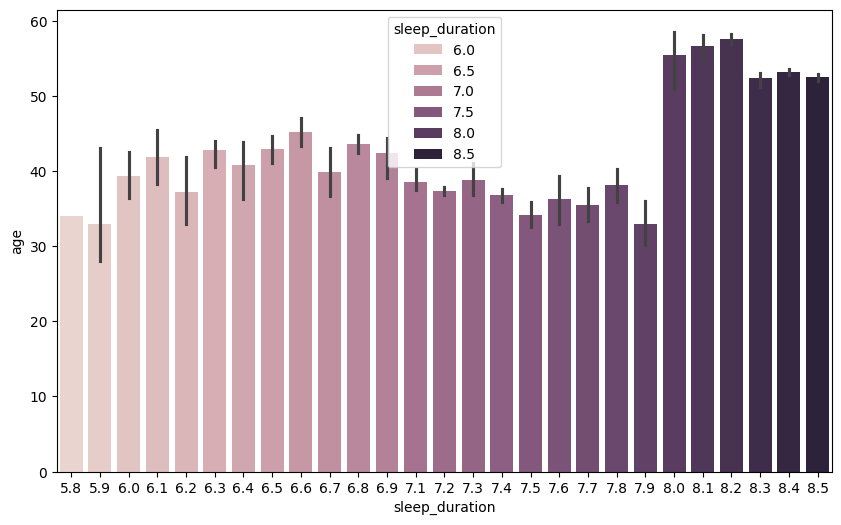

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(df, x='sleep_duration', y='age', hue='sleep_duration');

The distribution of sleep quality ratings

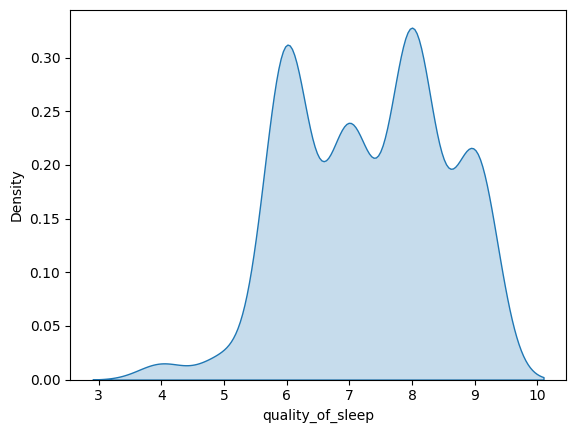

In [45]:
sns.kdeplot(df.quality_of_sleep, fill=True);

Correlation between Sleep Quality and Stress Level

In [46]:
df[['stress_level', 'quality_of_sleep']].corr()

,stress_level,quality_of_sleep
stress_level,1.000000,-0.898752
quality_of_sleep,-0.898752,1.000000


In [47]:
df.columns

Index(['gender', 'age', 'occupation', 'sleep_duration', 'quality_of_sleep',
       'physical_activity_level', 'stress_level', 'bmi_category', 'heart_rate',
       'daily_steps', 'systolic', 'diastolic', 'sleep_disorder'],
      dtype='object')

In [48]:
df[['physical_activity_level', 'sleep_duration', 'quality_of_sleep']].corr()

,physical_activity_level,sleep_duration,quality_of_sleep
physical_activity_level,1.000000,0.212360,0.192896
sleep_duration,0.212360,1.000000,0.883213
quality_of_sleep,0.192896,0.883213,1.000000


In [49]:
df.occupation

0      9
1      1
2      1
3      6
4      6
      ..
369    5
370    5
371    5
372    5
373    5
Name: occupation, Length: 374, dtype: int8

In [50]:
dfx = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [51]:
set(dfx.Occupation.unique())

{'Accountant',
 'Doctor',
 'Engineer',
 'Lawyer',
 'Manager',
 'Nurse',
 'Sales Representative',
 'Salesperson',
 'Scientist',
 'Software Engineer',
 'Teacher'}

In [52]:
df.occupation

0      9
1      1
2      1
3      6
4      6
      ..
369    5
370    5
371    5
372    5
373    5
Name: occupation, Length: 374, dtype: int8

In [53]:
avgqltperoccup = df.groupby('occupation').quality_of_sleep.mean()

In [54]:
avgqltperoccup = avgqltperoccup.sort_values(ascending=True)

In [55]:
avgqltperoccup

occupation
6     4.000000
8     5.000000
7     6.000000
9     6.500000
1     6.647887
10    6.975000
4     7.000000
5     7.369863
0     7.891892
3     7.893617
2     8.412698
Name: quality_of_sleep, dtype: float64

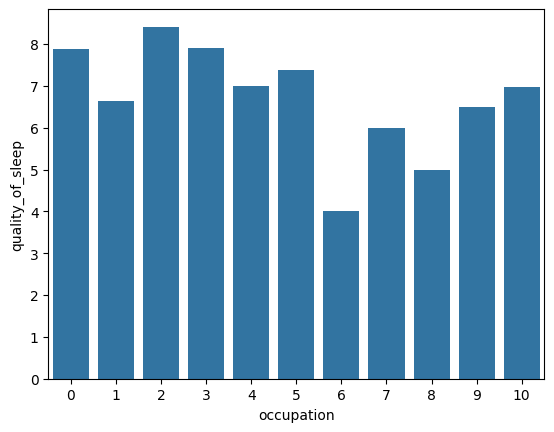

In [56]:
sns.barplot(x=avgqltperoccup.index, y=avgqltperoccup);

In [57]:
df

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,systolic,diastolic,sleep_disorder
0,1,27,9,6.1,6,42,6,3,77,4200,126,83,1
1,1,28,1,6.2,6,60,8,0,75,10000,125,80,1
2,1,28,1,6.2,6,60,8,0,75,10000,125,80,1
3,1,28,6,5.9,4,30,8,2,85,3000,140,90,2
4,1,28,6,5.9,4,30,8,2,85,3000,140,90,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,68,7000,140,95,2
370,0,59,5,8.0,9,75,3,3,68,7000,140,95,2
371,0,59,5,8.1,9,75,3,3,68,7000,140,95,2
372,0,59,5,8.1,9,75,3,3,68,7000,140,95,2


Is there a relationship between BMI category and sleep duration?

In [58]:
df[['bmi_category', 'sleep_duration', 'sleep_disorder']].corr()

,bmi_category,sleep_duration,sleep_disorder
bmi_category,1.000000,-0.376358,0.016573
sleep_duration,-0.376358,1.000000,0.177552
sleep_disorder,0.016573,0.177552,1.000000


Significant difference in sleep duration among individuals with and without sleep disorders?

In [62]:
from scipy.stats import f_oneway

In [71]:
sdgroup1 = df[df['sleep_disorder'] == 0].sleep_duration
sdgroup2 = df[df['sleep_disorder'] == 1].sleep_duration
sdgroup3 = df[df['sleep_disorder'] == 2].sleep_duration

In [72]:
f_stat, p_value = f_oneway(sdgroup1, sdgroup2, sdgroup3)

In [73]:
f_stat

31.913467623717107

In [74]:
p_value

1.6261510712202572e-13

In [75]:
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the means of the groups' attributes.")
else:
    print("There is no significant difference between the means of the groups' attributes.")

There is a significant difference between the means of the groups' attributes.


Significant difference in stress levels among individuals with and without sleep disorders?

In [79]:
slgroup1 = df[df.sleep_disorder == 0].stress_level
slgroup2 = df[df.sleep_disorder == 1].stress_level
slgroup3 = df[df.sleep_disorder == 2].stress_level

In [80]:
from scipy.stats import f_oneway

In [81]:
f_stats, p_value = f_oneway(slgroup1, slgroup2, slgroup3)

In [82]:
alpha = 0.05
if p_value < alpha:
    print('No significant difference')
else:
    print('There is a significant difference')

No significant difference
